# Decision Tree
* Can be used for both regression and classification
* White Box: can explain the reasons of the prediction, intuitive
* Importance of sclaing is lower than other models
* Cost function minimizes the impurity (Gini impurity...)
* Scikitlearn uses CART algoritm -> binary tree (If ID3 algorithm is used, the tree with multiple branches can be made)

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris['data'][:, 2:]
y = iris['target']

tr_clf = DecisionTreeClassifier(max_depth = 2)
tr_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<b>depth 1:</b> from 150 samples, 100 samples' petal lengths are longer than 2.45cm. 50 smaples' petal lengths are less than or equal to 2.45cm.<br>
* All 50 smaples with short petal length are setosa.
* 100 smaples with long petal length consist of 50 versicolors, 50 virginicas.<br>

<b>depth 2:</b> from 100 samples, 46 samples' petal widths are longer than 1.75cm. 54 smaples' petal widths are less than or equal to 1.75cm.<br>
* 49 from 54 samples are versicolor. 5 samples are virginica in real.
* 45 from 46 samples are virginica. 1 samples are versicolor in real.

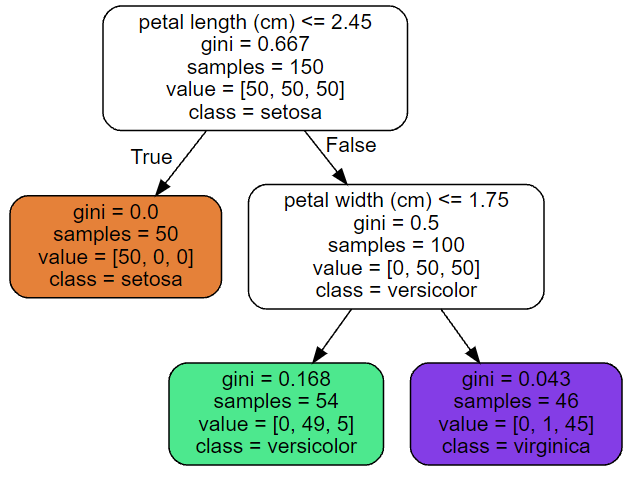

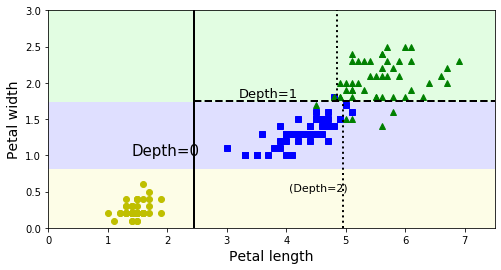

In [2]:
#from https://github.com/rickiepark/handson-ml2/blob/master
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tr_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## Estimation of class probability
Example: petal length is 5cm, petal width is 1.5cm<br>
Since 5 > 2.45cm, we need to consider depth 2 leaf nodes. Since 1.5 <= 1.75 cm, [0/54, 49/54, 5/54] = [0, 0.907404, 0.092592]
* <b>Predicted probability is same as long as point is in same rectangular above.</b>(result of [[5, 1.5]] and [[6, 1.5]] is same)

In [3]:
tr_clf.predict_proba([[5,1.5]]), tr_clf.predict([[5,1.5]])

(array([[0.        , 0.90740741, 0.09259259]]), array([1]))

In [4]:
tr_clf.predict_proba([[6,1.5]]), tr_clf.predict([[6,1.5]])

(array([[0.        , 0.90740741, 0.09259259]]), array([1]))

## CART training algorithm
CART algorithm tries to minimize the cost function below by finding threshold of the class k that separate the class k into two groups(left, right). After the algorithm finishes the separation, the algorithm tries to separate subsets whose impurity is not zero until reaches to the max_depth or cannot find a separation that lower the impurity.<br>
<b>Check: CART algorithm is greedy algorithm</b>, which implies that CART does not guarantee optimal solution. Since finding optimal tree is NP-Complete problem, we need to be satisfied with finding just good solution.

$J(k, t_k) =$$m_{left} \over m$$G_{left}+$$m_{right} \over m$$G_{right}$<br>
* $G_{left/right}$ is the impurity of left/right subset
* $m_{left/right}$ is the number of left/right subset samples

## Computational Complexity
<b>$O(log_2(m))$</b>: Tree model's computational complexity for searching is irrelevant to the number of attributes. (When tree is balanced)<br>
<b>$O(n \times mlog_2(m))$</b>: Tree model's computational complexity for training. When train set is too big, training takes long time.

## Gini vs Entropy
Gini impurity: $ G_i = 1 - \sum\limits_{k=1}^{n}{{p_{i,k}}^2} $, where $p_{i,k}$ is the ratio (the number of smaples of ith node from k class / the number of train samples of ith node)<br>
Entropy Impurity: $ H_i = -\sum\limits_{k=1 \atop p_{i,k} \ne 0}^{n}{{p_{i,k}}\log_2(p_{i,k})} $
* As more samples of a class are contained in a set, entoropy decreases. (ex. when value = [0, 49, 5], entropy of the node is $(-49/54)log_2(49/54) + (-5/54)log_2((5/54)) = 0.445$<br>

<b>Which impurity should be used?</b><br>
Generally, both function create similar tree. 
* However, Gini impurity is used basically for its faster computational speed. 
* However, if both trees are different, tree from Entropy is likely to be balanced more.

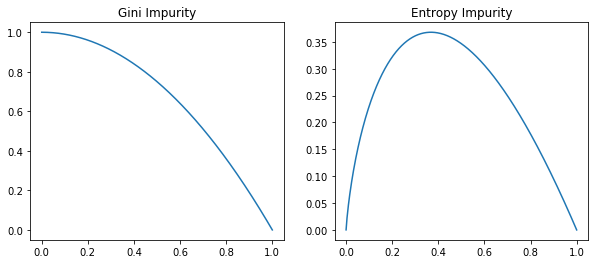

In [5]:
Xs = np.linspace(0.00001, 1, 500)
y_gini = 1 - Xs ** 2
y_entropy = - Xs * np.log(Xs)

fig = plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title('Gini Impurity')
plt.plot(Xs, y_gini)

plt.subplot(1,2,2)
plt.title('Entropy Impurity')
plt.plot(Xs, y_entropy)

## Regulation Parameter
Tree models are easy to be overfitted since they are nonparametric model(the number of parameters to be fitted is not decided before a training). Therefore, regulation is necessary.
* max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes, max_features ..
* If max_features are set less than the number of the attributes, <b>features are selected randomly.</b>

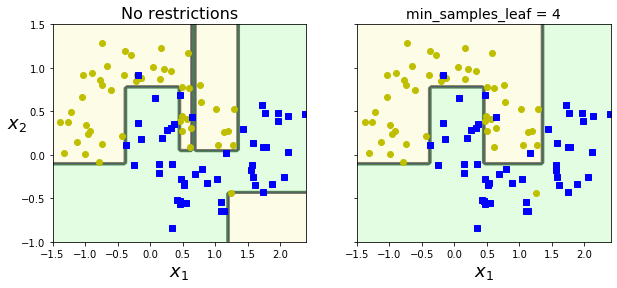

In [6]:
#from https://github.com/rickiepark/handson-ml2/blob/master
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

### Post-Pruning
After training a tree model without any regulations, eliminate unnecessary nodes.
<br>(however, Scikitlearn only support pre-pruning now)

## Regression
CART algorithm's cost function is $J(k, t_k) =$$m_{left} \over m$$MSE_{left}+$$m_{right} \over m$$MSE{right}$<br>
* $MSE_{node} = \Sigma_{i \in node}(\hat{y_{node}} - y^i)^2$ 
* $\hat{y_{node}} = $$1 \over m_{node}$ $\Sigma_{i \in node}y^i$ 

In [7]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [8]:
from sklearn.tree import DecisionTreeRegressor

tr_reg = DecisionTreeRegressor(max_depth = 2)
tr_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

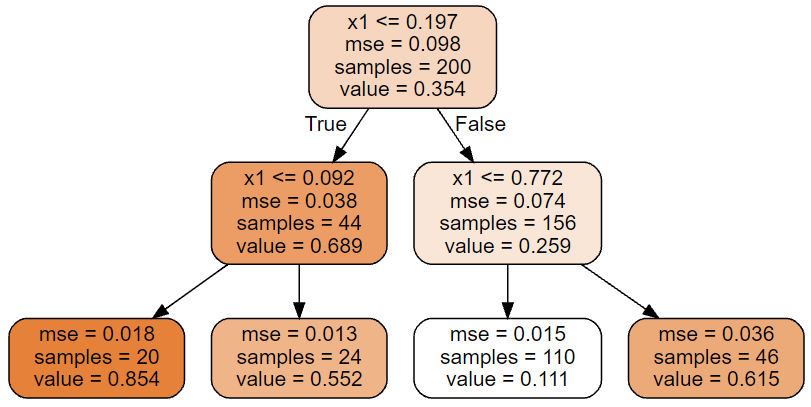

In [9]:
from sklearn.metrics import mean_squared_error

y_pred = tr_reg.predict(X)
mean_squared_error(y, y_pred)

0.019890182015163304

## Regulation
Tree regression model is easy to be overfitted as well. Proper regulations are necessary.

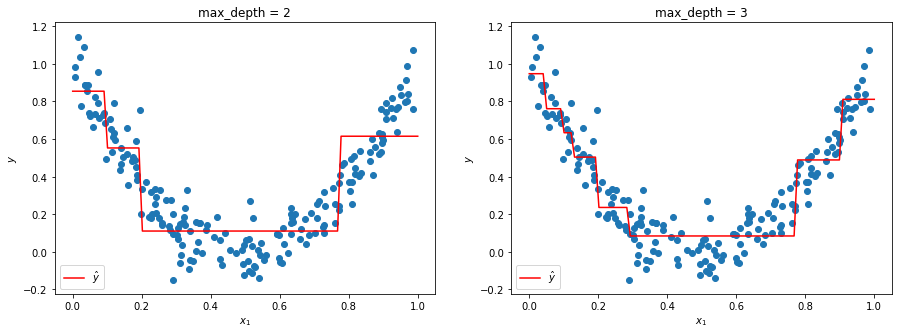

In [10]:
plt_idx = 1

depths = [2, 3]
fig = plt.figure(figsize = (15, 5))
for depth in depths:
    tr_reg_depth = DecisionTreeRegressor(max_depth = depth)
    tr_reg_depth.fit(X,y)
    X_plot = np.linspace(0, 1, 100).reshape(-1,1)
    y_plot = tr_reg_depth.predict(X_plot)
    plt.subplot(1, 2, plt_idx)
    plt.scatter(X, y)
    plt.plot(X_plot, y_plot, 'r-', label = '$\hat{y}$')
    plt.title('max_depth = {0}'.format(depth))
    plt.xlabel('$x_1$')
    plt.ylabel('$y$')
    plt.legend()

    plt_idx += 1

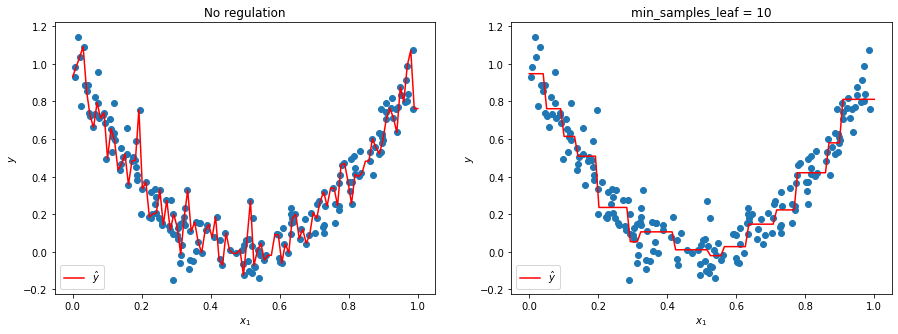

In [11]:
plt_idx = 1

types = ['No regulation', 'min_samples_leaf = 10']
min_leaf_list = [1, 10]
fig = plt.figure(figsize = (15, 5))
for t, leaf in zip(types, min_leaf_list):
    tr_reg_depth = DecisionTreeRegressor(min_samples_leaf = leaf)
    tr_reg_depth.fit(X,y)
    X_plot = np.linspace(0, 1, 100).reshape(-1,1)
    y_plot = tr_reg_depth.predict(X_plot)
    plt.subplot(1, 2, plt_idx)
    plt.scatter(X, y)
    plt.plot(X_plot, y_plot, 'r-', label = '$\hat{y}$')
    plt.title(t)
    plt.xlabel('$x_1$')
    plt.ylabel('$y$')
    plt.legend()

    plt_idx += 1

# Unstability
Decision tree model makes horizontal and vertical decision boundaries. This implies that the model is <b>very sensitive to the ratation of the train set. One way to solve this problem is using PCA.</b><br>
<b>Randomforest tries to minimize this unstability by averaging predictions from many trees.</b>

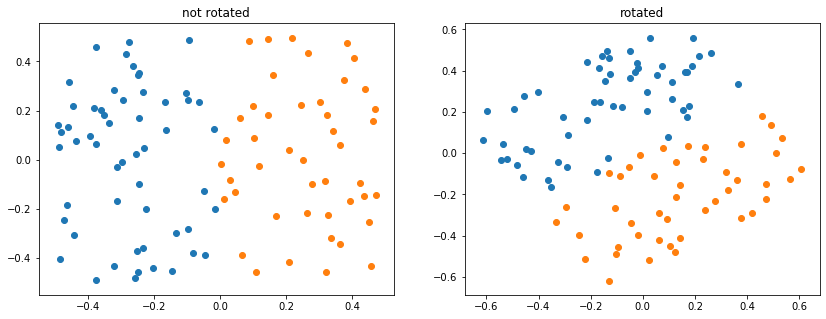

In [12]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

fig = plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
plt.title('not rotated')
plt.scatter(Xs[:,0][ys == 0], Xs[:,1][ys == 0])
plt.scatter(Xs[:,0][ys == 2], Xs[:,1][ys == 2])

rot_mat = np.array([[np.cos(45), -np.sin(45)], [np.sin(45), np.cos(45)]])
X_rot = Xs.dot(rot_mat)
plt.subplot(1, 2, 2)
plt.title('rotated')
plt.scatter(X_rot[:,0][ys == 0], X_rot[:,1][ys == 0])
plt.scatter(X_rot[:,0][ys == 2], X_rot[:,1][ys == 2])

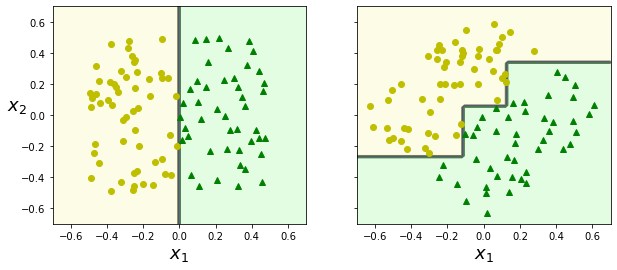

In [13]:
angle = np.pi / 4
rotat_mat = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
X_rot = Xs.dot(rotat_mat)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(X_rot, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, X_rot, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

1. (p238) Note: p값이 임계값보다 높으면 순도 향상이 우연에 의한 것이다?
2. (p239) mse는 각 노드의 depth가 깊어지면서 parent노드에 비해 더 작아질까?